

## Assignment 2: Data, Grammar and Engineering

**AMS MADE YMS31303**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>

---



## Question 1

We will work with data from the Guardian's version of [Wikileaks' Afghanistan war logs](http://www.theguardian.com/news/datablog/2010/jul/27/wikileaks-afghanistan-data-datajournalism). The table is stored on a GoogleDoc on the following address:

> [https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1](https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1)

r notebook for easy reference and interaction.Write a Python code snippet using IPython.display to embed this Google Sheet directly into a Jupyte

In [20]:
from IPython.display import IFrame, display

# URL of the Google Sheet you want to embed
sheet_url = "https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en&gid=1#gid=1"

# Display the Google Sheet
display(IFrame(src=sheet_url, width=850, height=800))


## Question 2
a) Save the csv file to your compluter and Load the data in Tab "TOTAL Casualties".

b) Display the first 5 rows of the dataset using .head().

c) Extract the column names and create a dictionary where each column name is the key, and the first value in that column is the value.

In [2]:
pip install pandas 


Note: you may need to restart the kernel to use updated packages.


In [142]:
#question 2 a+b
import pandas as pd

file_path = 'C:/Users/renee/OneDrive - De Haagse Hogeschool/Documenten/Master Made/MADE MASTER/DATA 1/reneev/WikiA.csv'

df = pd.read_csv(file_path)

new_columns = df.iloc[:, 1]  # Verkrijg de tweede kolom

df.head()

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
0,2004.0,January,15,51,23,0,11.0
1,2004.0,February,0,7,4,5,2.0
2,2004.0,March,19,2,0,2,3.0
3,2004.0,April,5,3,19,0,3.0
4,2004.0,May,18,29,56,6,9.0


In [143]:
#question 2C

column_first_value_dict = {col: df[col].iloc[0] for col in df.columns}

print(column_first_value_dict)

{'Year': np.float64(2004.0), 'Month': 'January', 'Taliban': '15', 'Civilians': '51', 'Afghan forces': '23', 'Nato (detailed in spreadsheet)': '0', 'Nato - official figures': np.float64(11.0)}


## Question 3
a) Plot a histogram of any numeric column from the dataset.

b) Use a kernel density plot (KDE) to visualize the distribution of another numeric column.

c) Create a bar chart of a categorical variable and discuss how the plot changes if you switch to a horizontal bar plot.

In [11]:
import seaborn as sns

In [15]:
import matplotlib.pyplot as plt

In [44]:
import pandas as pd

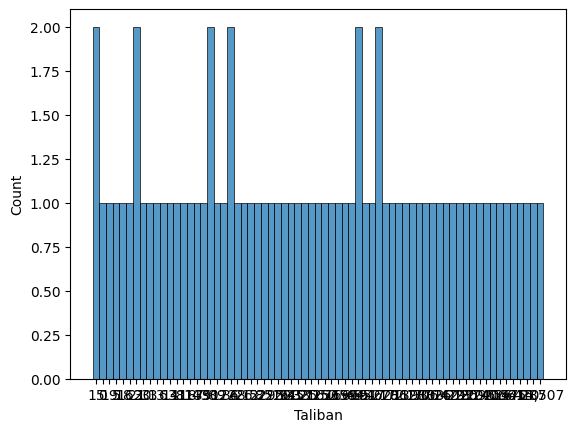

In [144]:
#question 3a

hist_plot = sns.histplot(data=df, x='Taliban', bins=50, kde=False, )


<Axes: xlabel='Year', ylabel='Count'>

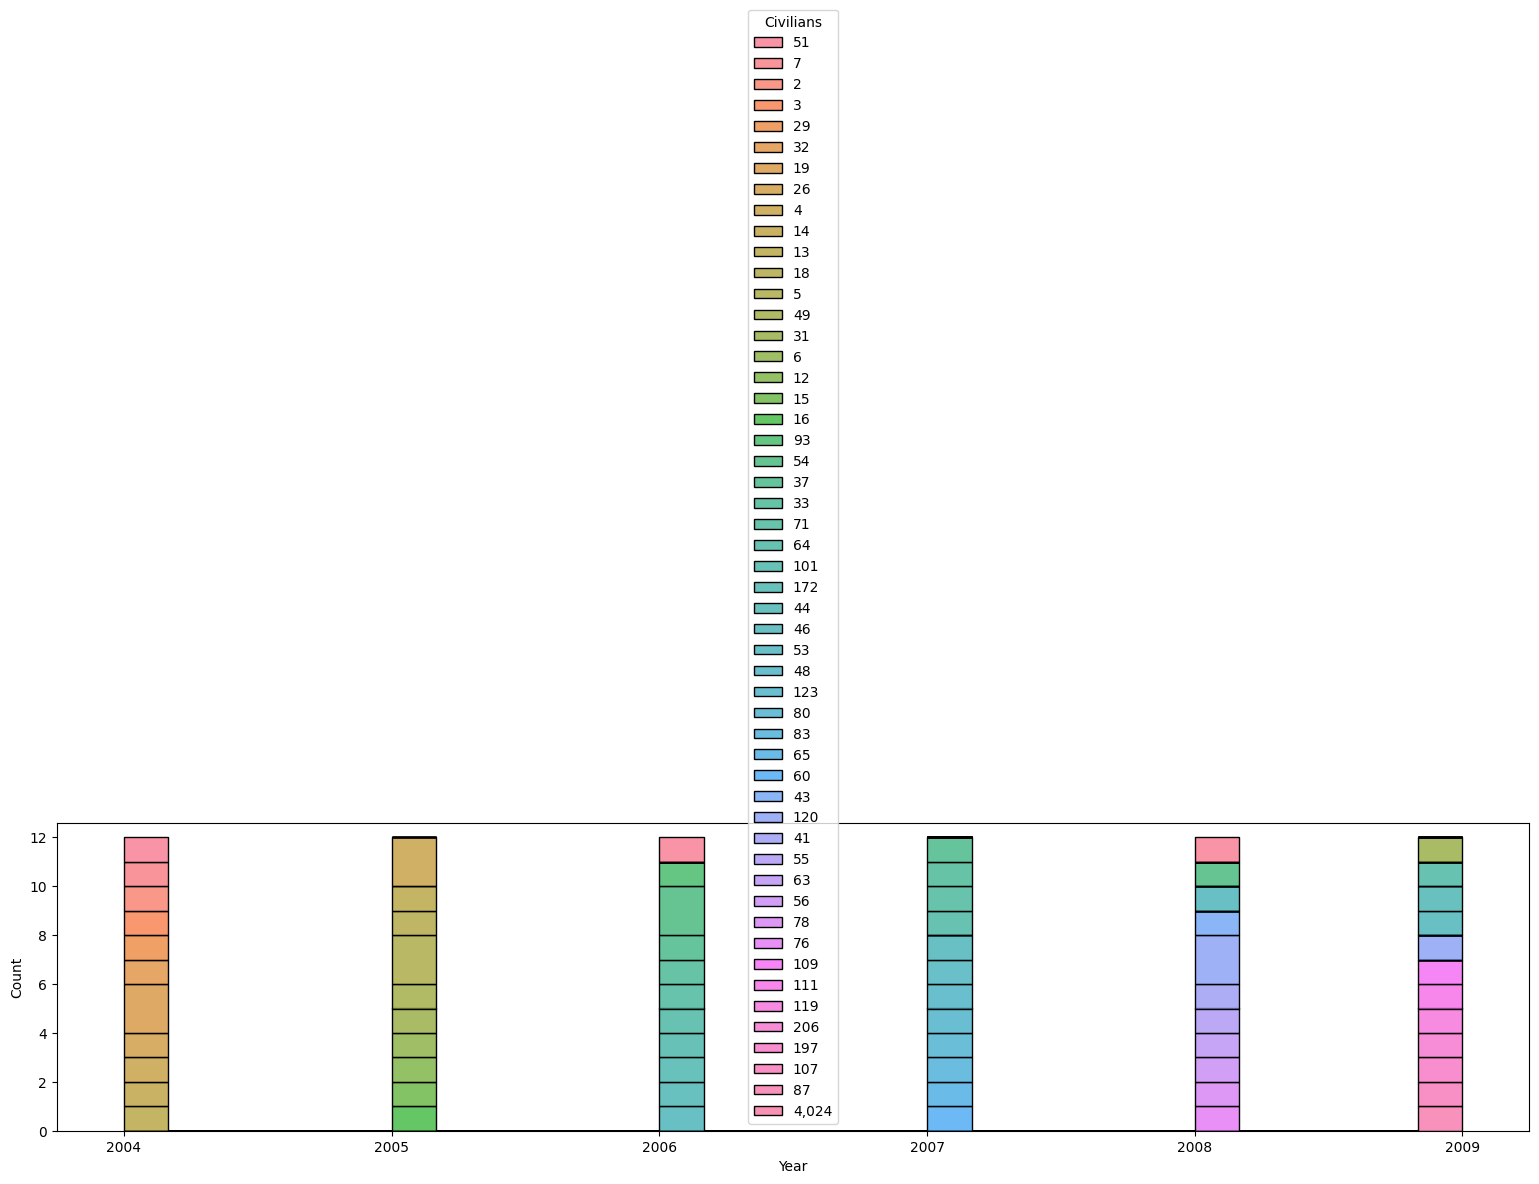

In [145]:
  plt.figure(figsize=(19, 4))
sns.histplot(data=df, x='Year', hue='Civilians', multiple='stack', bins=30)

In [146]:
#question 3b
print("column names in the dataframe")
print(df.columns)


column names in the dataframe
Index(['Year', 'Month', 'Taliban', 'Civilians', 'Afghan forces',
       'Nato (detailed in spreadsheet)', 'Nato - official figures'],
      dtype='object')


In [151]:
column_name = 'Afghan forces'
print(df.head())

     Year     Month Taliban Civilians Afghan forces  \
0  2004.0   January      15        51            23   
1  2004.0  February       0         7             4   
2  2004.0     March      19         2             0   
3  2004.0     April       5         3            19   
4  2004.0       May      18        29            56   

  Nato (detailed in spreadsheet)  Nato - official figures  
0                              0                     11.0  
1                              5                      2.0  
2                              2                      3.0  
3                              0                      3.0  
4                              6                      9.0  


Text(0, 0.5, 'Dichtheid')

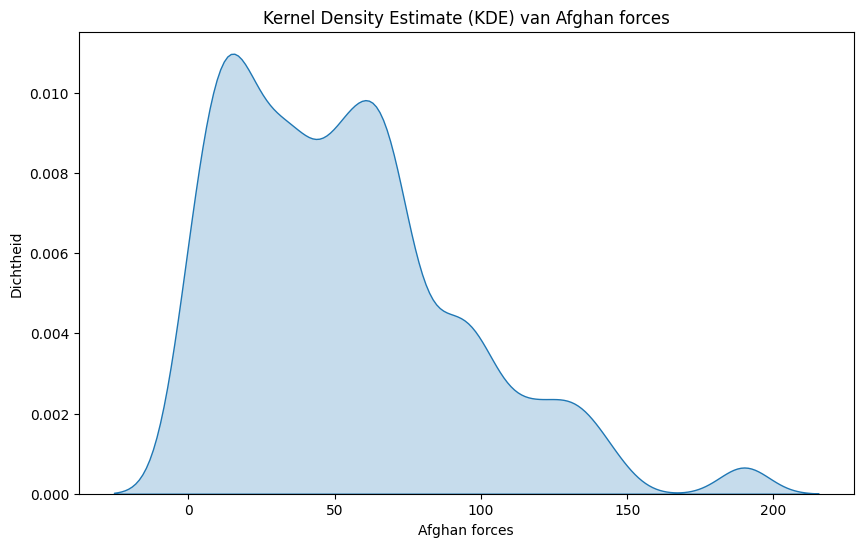

In [157]:
df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=column_name, fill=True, bw_adjust=0.5)

plt.title(f'Kernel Density Estimate (KDE) van {column_name}')
plt.xlabel(column_name)
plt.ylabel('Dichtheid')


In [161]:
#question 3c
categorialname = 'Nato - official figures'

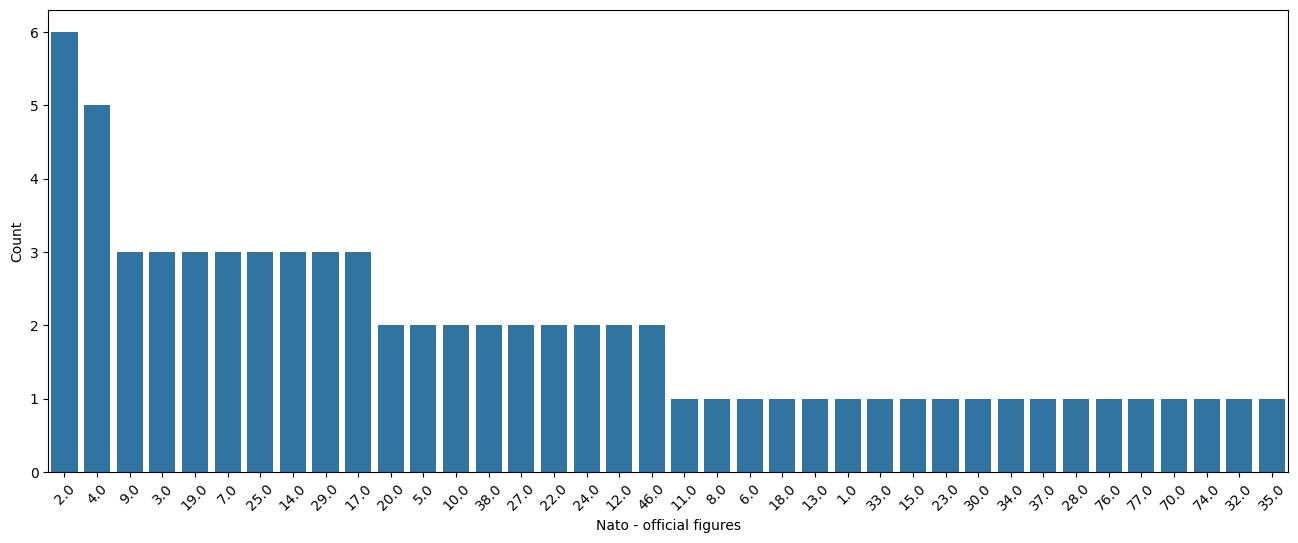

In [169]:
plt.figure(figsize=(16, 6))
sns.countplot(data=df, x=categorialname, order=df[categorialname].value_counts().index)
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels 
plt.show()

## Question 4
a) Write a loop that iterates through each row of a DataFrame and prints the value of one specific column.

b) Modify the loop so that it extracts rows where a numeric column value is greater than a threshold and stores these rows in a new DataFrame.

In [190]:
data = {
    'Afghan force': ['23', '4', '0'],
    'Nato - official figures': [11, 2, 3]
}
df = pd.DataFrame(data)

def print_column_value(row):
    print(row['Afghan force'])

df.apply(print_column_value, axis=1)

23
4
0


0    None
1    None
2    None
dtype: object

In [192]:
drempel = 10

filtered_df = df[df['Nato - official figures'] > drempel]

print("Gefilterde DataFrame:")
print(filtered_df)

Gefilterde DataFrame:
  Afghan force  Nato - official figures
0           23                       11


## Question 5
a) Create a list containing the names "Civilians" and "Afghan forces"

b) From the imported data keep the the values from these two columns only. Keep in mind that "Year" and "Month" identify each column and sould remain in the dataset.

c) Obtain a monthly total count of casualties for these two groups and create a line and a bar plot of them.


In [195]:
#question 5a
names_list = ["Civilians", "Afghan forces"]
print(names_list)

['Civilians', 'Afghan forces']


In [201]:
#question 5b
file_path = 'C:/Users/renee/OneDrive - De Haagse Hogeschool/Documenten/Master Made/MADE MASTER/DATA 1/reneev/WikiA.csv'
df = pd.read_csv(file_path)

columns_to_keep = ["Year", "Month", "Civilians", "Afghan forces"]



filtered_df = df[columns_to_keep]

print(filtered_df.head())

     Year     Month Civilians Afghan forces
0  2004.0   January        51            23
1  2004.0  February         7             4
2  2004.0     March         2             0
3  2004.0     April         3            19
4  2004.0       May        29            56


C:\Users\renee\AppData\Local\Temp\ipykernel_8780\327532761.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.dropna(subset=['Month'], inplace=True)


TypeError: no numeric data to plot

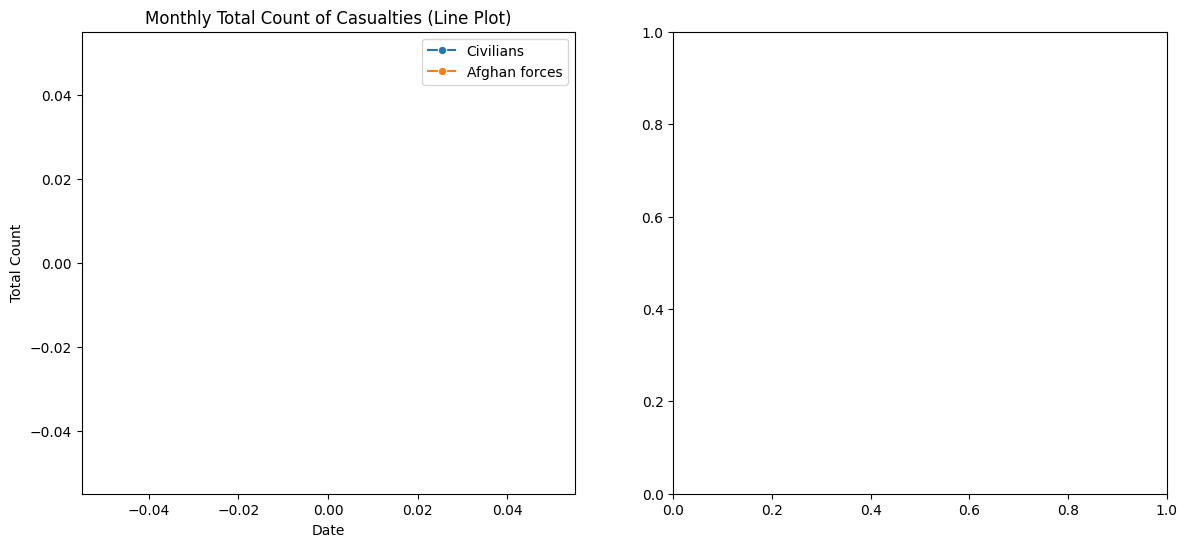

In [205]:
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
filtered_df['Month'] = filtered_df['Month'].map(month_map)

# Handle potential NaN values if month names were not all valid
filtered_df.dropna(subset=['Month'], inplace=True)

# Convert 'Year' and 'Month' to datetime for easier grouping
filtered_df['Date'] = pd.to_datetime(filtered_df[['Year', 'Month']].assign(DAY=1))

# Group by the 'Date' column and calculate the monthly totals
monthly_totals = filtered_df.groupby('Date').agg({'Civilians': 'sum', 'Afghan forces': 'sum'}).reset_index()

# Plotting
plt.figure(figsize=(14, 6))

# Line Plot
plt.subplot(1, 2, 1)
sns.lineplot(data=monthly_totals, x='Date', y='Civilians', label='Civilians', marker='o')
sns.lineplot(data=monthly_totals, x='Date', y='Afghan forces', label='Afghan forces', marker='o')
plt.title('Monthly Total Count of Casualties (Line Plot)')
plt.xlabel('Date')
plt.ylabel('Total Count')
plt.legend()

# Bar Plot
plt.subplot(1, 2, 2)
monthly_totals.set_index('Date')[['Civilians', 'Afghan forces']].plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title('Monthly Total Count of Casualties (Bar Plot)')
plt.xlabel('Date')
plt.ylabel('Total Count')
plt.legend(title='Casualty Type')

plt.tight_layout()
plt.show()

In [ ]:
git remote add origin <url>